In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data.csv')
print(data)

   1   2   3   4   5   6   7   8   9   ans
0  1   1   1   1   1   1   0   0   0     6
1  0   1   1   0   0   0   1   0   0     3
2  1   1   0   1   0   0   0   0   1     4
3  1   0   0   0   0   0   1   1   1     4
4  0   1   1   0   0   1   0   1   0     4
5  1   0   1   1   0   1   0   1   0     5
6  0   0   1   1   1   0   1   0   0     4
7  1   0   0   0   1   0   1   0   0     3
8  1   1   1   1   1   1   0   1   0     7
9  1   1   0   0   0   1   0   1   1     5


In [3]:
class Perceptron:

    def __init__(self, weights: list[int], bias: int) -> None:
        self.b = bias
        self.weights = weights
        self.count_of_weights = len(weights)

    def predict(self, sensor: list[int]) -> bool:
        s = 0
        for i in range(self.count_of_weights):
            s += sensor[i] * self.weights[i]

        return s >= self.b



In [4]:
class TwoLayerPerceptron(Perceptron):
    def __init__(self, weight: list[int], bias: int, weights : list[list [int]], biases: list [int]):
        super().__init__(weight, bias)
        self.first_layer = []
        self.first_layer_len = len(weights)
        for i in range(self.first_layer_len):
            self.first_layer.append(Perceptron(weights[i], biases[i]))

    def predict_tlp(self, sensor: list[int]):
        first_layer = []
        for i in range(self.first_layer_len):
            first_layer.append(self.first_layer[i].predict(sensor))
        return first_layer

    def predict(self, sensor: list[int]) -> int:
        sensor = self.predict_tlp(sensor)

        s = 0
        for i in range(self.count_of_weights):
            s += sensor[i] * self.weights[i]

        return s + self.b


In [5]:
class Process:
    def __init__(self, perceptron, ans):
        self.length = len(perceptron)
        self.perceptron = perceptron
        self.ans = ans

    def predict(self, sensor):
        res = []
        for i in range(self.length):
            if self.perceptron[i].predict_tlp(sensor):
                res.append(self.ans[i])
        if len(res) == 0:
            res.append('другое')
        return res

In [11]:

def build_plot(index):
    
    arr = data.to_numpy()[index]
    lines = (((0, 1), (2, 2)),
    ((1, 1), (2, 1)),
    ((1, 1), (0, 1)),
    ((1, 0), (0, 0)),
    ((0, 0), (0, 1)),
    ((0, 0), (1, 2)),
    ((0, 1), (1, 2)),
    ((1, 0), (1, 1)),
    ((0, 1), (0, 1)))
    colors = ['gray', '#00aeef'] # цвета серый и цвет ТюмГУ
    linestyles = ['--', '-']
    for i in range(9):
        plt.plot(lines[i][0], lines[i][1], ls=linestyles[arr[i]], c=colors[arr[i]])
    plt.axis('equal')

In [7]:
w = data.iloc[:, :9].apply(lambda x: 2*x - 1).to_numpy()
b = data.iloc[:, 9:10].to_numpy().reshape(1, -1)[0]
print(b)

[6 3 4 4 4 5 4 3 7 5]


Ответ перспетрона:  2


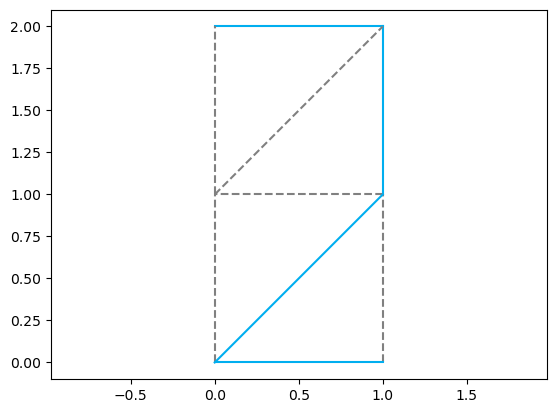

In [10]:
nums_perceptron = TwoLayerPerceptron(list(range(1, 11)), -1, w, b)
nums = data.iloc[:, :9].to_numpy()
num = nums[2] # выбираем какое число подать из данных
ans = nums_perceptron.predict(num) # получаем ответ
print('Ответ перспетрона: ', ans)
build_plot(ans) #строим график

Вариант оптимизации брать только 1 6 7 8 9 признаки вот их график

(np.float64(-0.05), np.float64(1.05), np.float64(-0.1), np.float64(2.1))

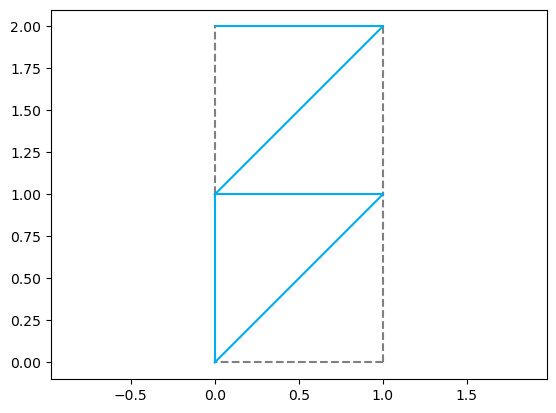

In [12]:
arr = [1, 0, 0, 0, 1, 0, 1, 1, 1]
lines = (((0, 1), (2, 2)),
((1, 1), (2, 1)),
((1, 1), (0, 1)),
((1, 0), (0, 0)),
((0, 0), (0, 1)),
((0, 0), (1, 2)),
((0, 1), (1, 2)),
((1, 0), (1, 1)),
((0, 1), (0, 1)))
colors = ['gray', '#00aeef'] # цвета серый и цвет ТюмГУ
linestyles = ['--', '-']
for i in range(9):
    plt.plot(lines[i][0], lines[i][1], ls=linestyles[arr[i]], c=colors[arr[i]])
plt.axis('equal')

In [25]:
data_opt = data.drop([' 2', ' 3', ' 4', ' 6'], axis=1)
data_opt

,1,5,7,8,9,ans
0,1,1,0,0,0,6
1,0,0,1,0,0,3
2,1,0,0,0,1,4
3,1,0,1,1,1,4
4,0,0,0,1,0,4
5,1,0,0,1,0,5
6,0,1,1,0,0,4
7,1,1,1,0,0,3
8,1,1,0,1,0,7
9,1,0,0,1,1,5


In [35]:
def build_plot_opt(arr):
    lines = (((0, 1), (2, 2)),
        ((0, 0), (0, 1)),
        ((0, 1), (1, 2)),
        ((1, 0), (1, 1)),
        ((0, 1), (0, 1)))
    lines_gray = (((1, 1), (2, 1)), ((1, 1), (0, 1)), ((1, 0), (0, 0)), ((0, 0), (1, 2)))
    colors = ['gray', '#00aeef'] # цвета серый и цвет ТюмГУ
    linestyles = ['--', '-']
    for i in range(4):
        plt.plot(lines_gray[i][0], lines_gray[i][1], ls=linestyles[0], c=colors[0])
    for i in range(5):
        plt.plot(lines[i][0], lines[i][1], ls=linestyles[arr[i]], c=colors[arr[i]])
    plt.axis('equal')
print(data_opt.iloc[:, :-1].to_numpy()[0])

[1 1 0 0 0]


без лишних признаков

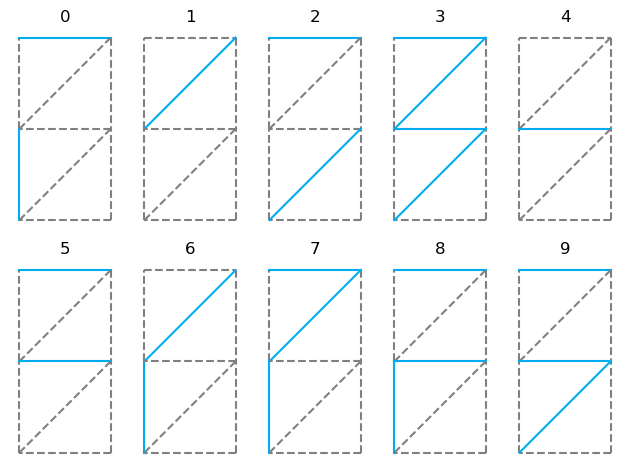

In [63]:
for x in range(10):
        ax = plt.subplot(2, 5, 1 + x)
        build_plot_opt(data_opt.iloc[:, :-1].to_numpy()[x])
        ax.grid(False)
        ax.axis('off')
        plt.title(x)
plt.tight_layout()


In [70]:
w = data_opt.iloc[:, :5].apply(lambda x: 2*x - 1).to_numpy()
print(w)
b = [2, 1, 2, 4, 1, 2, 2, 3, 3, 3]
nums_perceptron_opt = TwoLayerPerceptron(list(range(1, 11)), -1, w, b)

[[ 1  1 -1 -1 -1]
 [-1 -1  1 -1 -1]
 [ 1 -1 -1 -1  1]
 [ 1 -1  1  1  1]
 [-1 -1 -1  1 -1]
 [ 1 -1 -1  1 -1]
 [-1  1  1 -1 -1]
 [ 1  1  1 -1 -1]
 [ 1  1 -1  1 -1]
 [ 1 -1 -1  1  1]]


Ответ перспетрона:  2


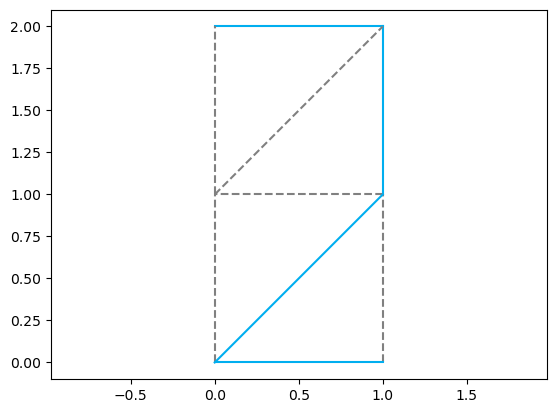

In [71]:
nums = data_opt.iloc[:, :9].to_numpy()
num = nums[2] # выбираем какое число подать из данных
ans = nums_perceptron_opt.predict(num) # получаем ответ
print('Ответ перспетрона: ', ans)
build_plot(ans) #строим график